<a href="https://colab.research.google.com/github/Prithwi13/NBA/blob/main/ASDS_5302_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import NBA Statistic from NBA-API

In [ ]:
from nba_api.stats import endpoints

In [ ]:
# List all of the endpoints
all_endpoints = dir(endpoints)
all_endpoints

['AllTimeLeadersGrids',
 'AssistLeaders',
 'AssistTracker',
 'BoxScoreAdvancedV2',
 'BoxScoreAdvancedV3',
 'BoxScoreDefensiveV2',
 'BoxScoreFourFactorsV2',
 'BoxScoreFourFactorsV3',
 'BoxScoreHustleV2',
 'BoxScoreMatchupsV3',
 'BoxScoreMiscV2',
 'BoxScoreMiscV3',
 'BoxScorePlayerTrackV2',
 'BoxScorePlayerTrackV3',
 'BoxScoreScoringV2',
 'BoxScoreScoringV3',
 'BoxScoreSummaryV2',
 'BoxScoreTraditionalV2',
 'BoxScoreTraditionalV3',
 'BoxScoreUsageV2',
 'BoxScoreUsageV3',
 'CommonAllPlayers',
 'CommonPlayerInfo',
 'CommonPlayoffSeries',
 'CommonTeamRoster',
 'CommonTeamYears',
 'CumeStatsPlayer',
 'CumeStatsPlayerGames',
 'CumeStatsTeam',
 'CumeStatsTeamGames',
 'DefenseHub',
 'DraftBoard',
 'DraftCombineDrillResults',
 'DraftCombineNonStationaryShooting',
 'DraftCombinePlayerAnthro',
 'DraftCombineSpotShooting',
 'DraftCombineStats',
 'DraftHistory',
 'FantasyWidget',
 'FranchiseHistory',
 'FranchiseLeaders',
 'FranchisePlayers',
 'GLAlumBoxScoreSimilarityScore',
 'GameRotation',
 'HomeP

### Data we choose to used for predictions:
* leaguestandings - Standings
* leaguedashteamstats - Team Statistics
* leaguedashplayerstats - Player Statistics

In [ ]:
from nba_api.stats.endpoints import leaguedashteamstats, leaguedashplayerstats, leaguestandings

# Leagues Standings:
*** league standing is the ranked table showing how every team in a league compares based on their performance so far in a season.

It contains(shape):-
30 rows → One row per NBA team (there are 30 teams in the league)
81 columns → 81 different pieces of data (fields) for each team
Those 81 columns generally fall into a few categories:

1. Identifiers & Context:
LeagueID, SeasonID – Which league and season these stats belong to.
TeamID, TeamCity, TeamName – Unique team identifier and its city/name.
Conference, Division – Which conference (East/West) and division the team plays in.

2. Overall Standings & Seeding:
WINS, LOSSES, WinPCT – Total wins, losses, and win‑percentage (wins ÷ games played).
LeagueRank, ConferenceRecord, DivisionRecord – Your rank overall (rarely used), plus your conference‑ and division‑level won/loss split.
LeagueRank vs. ConferenceRank vs. DivisionRank – Position in the overall league, within your conference, and within your division.
PlayoffRank – Seeding position for the playoffs (1–8 in each conference).
ClinchIndicator – “Y” if the team has already clinched a playoff spot; otherwise blank.

3. Games‑Back & Seeding Margin:
GB (not shown above but implicit) – “Games Back” from first place (calculated).
ConferenceGamesBack, DivisionGamesBack – How many games you trail the top seed in your conference/division.

4. Home/Road & Recent Splits:
HOME, ROAD – Overall record at home vs. on the road (e.g. 25‑16).
L10, Last10Home, Last10Road – Record in the last 10 total games, and last 10 home or road games.
OT – Record in overtime games.
ThreePTSOrLess, TenPTSOrMore – Records in games decided by 3 points or fewer, or by 10 points or more.

5. Streaks:
LongHomeStreak, LongRoadStreak – Longest consecutive home/road winning or losing streaks (integer).
LongWinStreak, LongLossStreak – Season‑high winning and losing streaks.
CurrentHomeStreak, CurrentRoadStreak, CurrentStreak – How many straight home wins/losses, road wins/losses, or overall wins/losses you’re on now.
str... columns (e.g. strCurrentStreak) give a human‑readable version like "W 4" or "L 2".

6. Situational Records:
AheadAtHalf / BehindAtHalf / TiedAtHalf – Your record when leading, trailing, or tied at halftime.
AheadAtThird / BehindAtThird / TiedAtThird – Same for after the third quarter.
Score100PTS / OppScore100PTS – Your record in games you scored 100+ points, and ones where your opponent did.
OppOver500, LeadInFGPCT, LeadInReb, FewerTurnovers – Records when your opponent’s record was over .500, when you led in FG% or rebounding, or when you committed fewer turnovers.

7. Division & Conference Matchups:
vsEast, vsAtlantic, vsCentral, vsSoutheast, vsWest, vsNorthwest, vsPacific, vsSouthwest
Your record against each conference (East/West) or division within your conference (Atlantic, Central, Southeast, etc.).

8. Month‑by‑Month Splits:
Jan, Feb, Mar, Apr, Oct, Nov, Dec – Your record in each calendar month.
May – Sep – All zeroes this season (no games scheduled in those months for the regular season).

9. All‑Star Break Splits:
PreAS, PostAS – Your record before and after the All‑Star break.

In [ ]:
df_standings = leaguestandings.LeagueStandings(season='2024-25').get_data_frames()[0]
df_standings.head()

NameError: name 'leaguestandings' is not defined

In [ ]:
df_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LeagueID                 30 non-null     object 
 1   SeasonID                 30 non-null     object 
 2   TeamID                   30 non-null     int64  
 3   TeamCity                 30 non-null     object 
 4   TeamName                 30 non-null     object 
 5   Conference               30 non-null     object 
 6   ConferenceRecord         30 non-null     object 
 7   PlayoffRank              30 non-null     int64  
 8   ClinchIndicator          30 non-null     object 
 9   Division                 30 non-null     object 
 10  DivisionRecord           30 non-null     object 
 11  DivisionRank             30 non-null     int64  
 12  WINS                     30 non-null     int64  
 13  LOSSES                   30 non-null     int64  
 14  WinPCT                   30 

In [ ]:
df_standings.shape #rows and columns

(30, 81)

In [ ]:
df_standings.columns

Index(['LeagueID', 'SeasonID', 'TeamID', 'TeamCity', 'TeamName', 'Conference',
       'ConferenceRecord', 'PlayoffRank', 'ClinchIndicator', 'Division',
       'DivisionRecord', 'DivisionRank', 'WINS', 'LOSSES', 'WinPCT',
       'LeagueRank', 'Record', 'HOME', 'ROAD', 'L10', 'Last10Home',
       'Last10Road', 'OT', 'ThreePTSOrLess', 'TenPTSOrMore', 'LongHomeStreak',
       'strLongHomeStreak', 'LongRoadStreak', 'strLongRoadStreak',
       'LongWinStreak', 'LongLossStreak', 'CurrentHomeStreak',
       'strCurrentHomeStreak', 'CurrentRoadStreak', 'strCurrentRoadStreak',
       'CurrentStreak', 'strCurrentStreak', 'ConferenceGamesBack',
       'DivisionGamesBack', 'ClinchedConferenceTitle', 'ClinchedDivisionTitle',
       'ClinchedPlayoffBirth', 'EliminatedConference', 'EliminatedDivision',
       'AheadAtHalf', 'BehindAtHalf', 'TiedAtHalf', 'AheadAtThird',
       'BehindAtThird', 'TiedAtThird', 'Score100PTS', 'OppScore100PTS',
       'OppOver500', 'LeadInFGPCT', 'LeadInReb', 'FewerTurnove

**Player Statistics:**

player_stats DataFrame explains individual player statistics,it comes in at 569 rows × 66 columns—that is:

569 rows → one for each player who logged minutes in the 2024‑25 season.
66 columns → a mix of raw statistical measures and each measure’s corresponding league‑wide rank

1.Player & Team Identification:
PLAYER_ID, PLAYER_NAME, NICKNAME – Unique player ID, full name, and common nickname.
TEAM_ID, TEAM_ABBREVIATION – Team’s numeric ID and three‑letter code.
AGE – Player’s age (in years).

2.Games & Outcomes:
GP, W, L – Games played, wins, and losses.
W_PCT – Winning percentage (wins ÷ games played).

3.Playing Time
MIN – Average minutes played per game.


4.Shooting & Scoring:
FGM, FGA, FG_PCT – Field goals made, attempted, and success rate.
FG3M, FG3A, FG3_PCT – Three‑pointers made, attempted, and success rate.
FTM, FTA, FT_PCT – Free‑throws made, attempted, and success rate.
PTS – Points scored per game.

5.Rebounding:
OREB, DREB, REB – Offensive rebounds, defensive rebounds, and total rebounds per game.

6.Playmaking & Ball‑Handling:
AST – Assists per game.
TOV – Turnovers per game.

7.Defense & Miscellaneous Counting Stats:
STL – Steals per game.
BLK – Blocks per game.
BLKA – Shots blocked against per game.
PF, PFD – Personal fouls committed and drawn per game.
PLUS_MINUS – Net point differential while on court.
DD2, TD3 – Total double‑doubles and triple‑doubles.
NBA_FANTASY_PTS, WNBA_FANTASY_PTS – Composite fantasy‑league scoring.

8.Efficiency & Impact Metrics:
TS_PCT – True‑shooting percentage (accounts for 2/3/FT efficiency).
EFG_PCT – Effective field‑goal percentage (3s weighted as 1.5×).
PACE – Team possessions per 48 min with the player on court.
PIE – Player Impact Estimate (share of game “impact”).

9.League‑Wide Ranks:
For each raw stat above, there’s a corresponding _RANK column (e.g., PTS_RANK, REB_RANK, AST_RANK, …, WNBA_FANTASY_PTS_RANK) showing the player’s position among all 569 players in that category.





In [ ]:
player_stats = leaguedashplayerstats.LeagueDashPlayerStats(season='2024-25').get_data_frames()[0]
player_stats.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
0,1630639,A.J. Lawson,A.J.,1610612761,TOR,24.0,26,14,12,0.538,...,383,241,200,327,337,299,375,159,44,364
1,1631260,AJ Green,AJ,1610612749,MIL,25.0,73,44,29,0.603,...,370,99,498,290,214,62,247,281,44,225
2,1642358,AJ Johnson,AJ,1610612764,WAS,20.0,29,8,21,0.276,...,441,312,217,369,347,495,379,281,44,372
3,203932,Aaron Gordon,Aaron,1610612743,DEN,29.0,51,33,18,0.647,...,265,451,301,107,139,41,183,134,44,181
4,1628988,Aaron Holiday,Aaron,1610612745,HOU,28.0,62,39,23,0.629,...,311,224,259,292,292,115,322,281,44,315


In [ ]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PLAYER_ID              569 non-null    int64  
 1   PLAYER_NAME            569 non-null    object 
 2   NICKNAME               569 non-null    object 
 3   TEAM_ID                569 non-null    int64  
 4   TEAM_ABBREVIATION      569 non-null    object 
 5   AGE                    569 non-null    float64
 6   GP                     569 non-null    int64  
 7   W                      569 non-null    int64  
 8   L                      569 non-null    int64  
 9   W_PCT                  569 non-null    float64
 10  MIN                    569 non-null    float64
 11  FGM                    569 non-null    int64  
 12  FGA                    569 non-null    int64  
 13  FG_PCT                 569 non-null    float64
 14  FG3M                   569 non-null    int64  
 15  FG3A  

In [ ]:
player_stats.shape

(569, 66)

In [ ]:
player_stats.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
       'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
       'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
       'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
       'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
       'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK'],
      dtype='object')

**Team Statistics**
It explains the per-game performance stats for each NBA team over a season, It includes:-

30 rows = Stats for 30 teams columns
54 columns = features/metrics recorded for each team. These include:

1.Team Identification
TEAM_ID, TEAM_NAME – Unique team ID and full team name.

2.Games & Results:
GP, W, L – Games played, wins, and losses.
W_PCT – Win percentage.

3.Playing Time:
MIN – Total minutes played per game.

4.Shooting:
FGM, FGA, FG_PCT – Field goals made, attempted, and shooting percentage.
FG3M, FG3A, FG3_PCT – Three‑pointers made, attempted, and shooting percentage.
FTM, FTA, FT_PCT – Free throws made, attempted, and free throw percentage.

5.Rebounding:
OREB, DREB, REB – Offensive, defensive, and total rebounds per game.

6.Playmaking & Turnovers:
AST – Assists per game.
TOV – Turnovers per game.

7.Defense & Fouls:
STL – Steals per game.
BLK – Blocks per game.
BLKA – Shots blocked against.
PF, PFD – Personal fouls committed and drawn.

8.Scoring & Impact:
PTS – Points scored per game.
PLUS_MINUS – Average point differential when the team is on the floor.

9.League‑Wide Rankings:
*_RANK – Rank of the team in each respective stat across all 30 teams
(e.g., W_RANK, FG_PCT_RANK, AST_RANK, PTS_RANK, etc.).


In [ ]:
team_stats = leaguedashteamstats.LeagueDashTeamStats(season='2024-25').get_data_frames()[0]
team_stats.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,1610612737,Atlanta Hawks,82,40,42,0.488,3956.0,3556,7528,0.472,...,14,2,26,2,12,15,22,8,5,18
1,1610612738,Boston Celtics,82,61,21,0.744,3966.0,3413,7382,0.462,...,8,16,2,29,5,1,2,27,8,3
2,1610612751,Brooklyn Nets,82,26,56,0.317,3956.0,3086,7060,0.437,...,29,24,23,20,26,27,28,14,29,26
3,1610612766,Charlotte Hornets,82,19,63,0.232,3951.0,3142,7308,0.430,...,9,26,25,26,21,23,16,22,30,27
4,1610612741,Chicago Bulls,82,39,43,0.476,3951.0,3543,7545,0.470,...,3,5,20,24,18,18,6,30,6,20


In [ ]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TEAM_ID          30 non-null     int64  
 1   TEAM_NAME        30 non-null     object 
 2   GP               30 non-null     int64  
 3   W                30 non-null     int64  
 4   L                30 non-null     int64  
 5   W_PCT            30 non-null     float64
 6   MIN              30 non-null     float64
 7   FGM              30 non-null     int64  
 8   FGA              30 non-null     int64  
 9   FG_PCT           30 non-null     float64
 10  FG3M             30 non-null     int64  
 11  FG3A             30 non-null     int64  
 12  FG3_PCT          30 non-null     float64
 13  FTM              30 non-null     int64  
 14  FTA              30 non-null     int64  
 15  FT_PCT           30 non-null     float64
 16  OREB             30 non-null     int64  
 17  DREB             3

In [ ]:
team_stats.shape

(30, 54)

In [ ]:
team_stats.describe()

,TEAM_ID,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
count,3.000000e+01,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.610613e+09,82.0,41.000000,41.000000,0.500067,3957.333333,3418.866667,7317.566667,0.467233,1110.133333,...,15.500000,15.500000,15.466667,15.500000,15.500000,15.400000,15.466667,15.500000,15.466667,15.500000
std,8.803408e+00,0.0,13.354581,13.354581,0.162786,11.290317,161.490201,184.229183,0.018005,113.688544,...,8.803408,8.803408,8.850222,8.803408,8.803408,8.791061,8.838526,8.803408,8.811174,8.803408
min,1.610613e+09,82.0,17.000000,14.000000,0.207000,3941.000000,3086.000000,7007.000000,0.430000,921.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.610613e+09,82.0,34.500000,32.000000,0.421000,3947.250000,3326.750000,7171.500000,0.454000,1033.500000,...,8.250000,8.250000,8.250000,8.250000,8.250000,8.000000,8.250000,8.250000,8.250000,8.250000
50%,1.610613e+09,82.0,40.500000,41.500000,0.494000,3956.000000,3413.500000,7361.000000,0.469000,1086.500000,...,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000
75%,1.610613e+09,82.0,50.000000,47.500000,0.610000,3964.750000,3539.500000,7408.000000,0.479000,1160.250000,...,22.750000,22.750000,22.750000,22.750000,22.750000,22.500000,22.750000,22.750000,22.750000,22.750000
max,1.610613e+09,82.0,68.000000,65.000000,0.829000,3986.000000,3724.000000,7659.000000,0.506000,1457.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000


In [ ]:
team_stats.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS',
       'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK'],
      dtype='object')

# Merge Data

In [ ]:
### Player Statistics aggerated to team levels
player_agg = player_stats.groupby(['TEAM_ID']).agg({
    'PTS': 'mean', # Points
    'AST': 'mean', # Assist
    'REB': 'mean', # Rebound
    'FG_PCT': 'mean', # Field Goal Percentage
    'FG3_PCT': 'mean', # Three-Point Field Goals Made percentage
    'TOV': 'mean' # Turnover
}).reset_index()
player_agg

,TEAM_ID,PTS,AST,REB,FG_PCT,FG3_PCT,TOV
0,1610612737,538.277778,142.222222,210.111111,0.478167,0.343278,67.500000
1,1610612738,561.823529,125.823529,218.647059,0.430588,0.294941,54.529412
2,1610612739,565.333333,122.833333,210.388889,0.455389,0.307833,56.277778
3,1610612740,398.590909,95.181818,162.227273,0.455318,0.288409,50.954545
4,1610612741,460.950000,120.950000,190.600000,0.484350,0.322400,55.150000
5,1610612742,524.631579,107.052632,203.210526,0.523000,0.295526,58.947368
6,1610612743,582.470588,149.529412,220.647059,0.467235,0.301059,65.352941
7,1610612744,487.411765,126.941176,198.352941,0.435647,0.277000,56.529412
8,1610612745,528.444444,108.166667,225.166667,0.469389,0.298833,60.555556
9,1610612746,532.294118,126.529412,210.588235,0.464588,0.299118,67.470588


In [ ]:
team_stats = team_stats[[
    'TEAM_ID',
    'TEAM_NAME',
    'W', # Win
    'L', # Lose
    'W_PCT', # Win Percentage
    'FG_PCT', # Field Goal Percentage
    'FG3M', # Three-Point Field Goals Made
    'FG3_PCT', # Three-Point Field Goals Made percentage
    'REB', # Rebound
    'AST', # Number of Assist
    'TOV', # Turnover
    'STL', # Steal
    'BLK', # Block
    'PLUS_MINUS' # difference in a team's score
]]
team_stats

,TEAM_ID,TEAM_NAME,W,L,W_PCT,FG_PCT,FG3M,FG3_PCT,REB,AST,TOV,STL,BLK,PLUS_MINUS
0,1610612737,Atlanta Hawks,40,42,0.488,0.472,1107,0.358,3649,2426,1273.0,798,419,-93.0
1,1610612738,Boston Celtics,61,21,0.744,0.462,1457,0.368,3716,2144,973.0,589,452,747.0
2,1610612751,Brooklyn Nets,26,56,0.317,0.437,1113,0.344,3387,2063,1244.0,639,352,-583.0
3,1610612766,Charlotte Hornets,19,63,0.232,0.430,1065,0.339,3706,1994,1271.0,607,368,-747.0
4,1610612741,Chicago Bulls,39,43,0.476,0.470,1266,0.367,3760,2383,1203.0,621,386,-128.0
5,1610612739,Cleveland Cavaliers,64,18,0.780,0.491,1303,0.383,3723,2304,1082.0,670,350,782.0
6,1610612742,Dallas Mavericks,39,43,0.476,0.479,1020,0.364,3530,2070,1151.0,636,445,-98.0
7,1610612743,Denver Nuggets,50,32,0.610,0.506,984,0.376,3751,2542,1169.0,656,402,319.0
8,1610612765,Detroit Pistons,44,38,0.537,0.476,1051,0.362,3670,2165,1218.0,652,431,156.0
9,1610612744,Golden State Warriors,48,34,0.585,0.451,1264,0.364,3721,2386,1152.0,771,391,271.0


In [ ]:
standings_features = ['TeamID', 'TeamName', 'Conference', 'Division','PlayoffRank','HOME', 'ROAD', 'L10']
standings = df_standings[standings_features].copy()
standings = standings.rename(columns={
    'TeamID': 'TEAM_ID',
    'TeamName': 'TEAM_NAME'
}) # To match with player stats and team stats data
standings.head()

,TEAM_ID,TEAM_NAME,Conference,Division,PlayoffRank,HOME,ROAD,L10
0,1610612739,Cavaliers,East,Central,1,34-7,30-11,6-4
1,1610612760,Thunder,West,Northwest,1,35-6,32-8,8-2
2,1610612738,Celtics,East,Atlantic,2,28-13,33-8,8-2
3,1610612745,Rockets,West,Southwest,2,29-12,23-17,6-4
4,1610612747,Lakers,West,Pacific,3,31-10,19-22,6-4


In [ ]:
# Split the Win/Loss Columns
def split_record(record):
    try:
        wins, losses = map(int, record.split('-'))
        return wins, losses
    except:
        return None, None

standings[['HOME_W', 'HOME_L']] = standings['HOME'].apply(lambda x: pd.Series(split_record(x)))
standings[['ROAD_W', 'ROAD_L']] = standings['ROAD'].apply(lambda x: pd.Series(split_record(x)))
standings[['L10_W', 'L10_L']]   = standings['L10'].apply(lambda x: pd.Series(split_record(x)))
standings.head()

,TEAM_ID,TEAM_NAME,Conference,Division,PlayoffRank,HOME,ROAD,L10,HOME_W,HOME_L,ROAD_W,ROAD_L,L10_W,L10_L
0,1610612739,Cavaliers,East,Central,1,34-7,30-11,6-4,34,7,30,11,6,4
1,1610612760,Thunder,West,Northwest,1,35-6,32-8,8-2,35,6,32,8,8,2
2,1610612738,Celtics,East,Atlantic,2,28-13,33-8,8-2,28,13,33,8,8,2
3,1610612745,Rockets,West,Southwest,2,29-12,23-17,6-4,29,12,23,17,6,4
4,1610612747,Lakers,West,Pacific,3,31-10,19-22,6-4,31,10,19,22,6,4


In [ ]:
# Step 1: merge team stats and player stats by 'TEAM_ID'
df_merge1 = pd.merge(team_stats, player_agg, on='TEAM_ID', suffixes=('', '_PLAYER'))
# Second: merge with standings by 'TEAM_ID' and 'TEAM_NAME'
df = pd.merge(df_merge1, standings.drop(columns='TEAM_NAME'), on='TEAM_ID', how='inner')

In [ ]:
df_merge1.head()

,TEAM_ID,TEAM_NAME,W,L,W_PCT,FG_PCT,FG3M,FG3_PCT,REB,AST,TOV,STL,BLK,PLUS_MINUS,PTS,AST_PLAYER,REB_PLAYER,FG_PCT_PLAYER,FG3_PCT_PLAYER,TOV_PLAYER
0,1610612737,Atlanta Hawks,40,42,0.488,0.472,1107,0.358,3649,2426,1273.0,798,419,-93.0,538.277778,142.222222,210.111111,0.478167,0.343278,67.500000
1,1610612738,Boston Celtics,61,21,0.744,0.462,1457,0.368,3716,2144,973.0,589,452,747.0,561.823529,125.823529,218.647059,0.430588,0.294941,54.529412
2,1610612751,Brooklyn Nets,26,56,0.317,0.437,1113,0.344,3387,2063,1244.0,639,352,-583.0,400.400000,87.150000,155.400000,0.406600,0.307900,50.750000
3,1610612766,Charlotte Hornets,19,63,0.232,0.430,1065,0.339,3706,1994,1271.0,607,368,-747.0,376.090909,82.363636,164.227273,0.432182,0.316273,52.000000
4,1610612741,Chicago Bulls,39,43,0.476,0.470,1266,0.367,3760,2383,1203.0,621,386,-128.0,460.950000,120.950000,190.600000,0.484350,0.322400,55.150000


In [ ]:
df.head()

,TEAM_ID,TEAM_NAME,W,L,W_PCT,FG_PCT,FG3M,FG3_PCT,REB,AST,...,PlayoffRank,HOME,ROAD,L10,HOME_W,HOME_L,ROAD_W,ROAD_L,L10_W,L10_L
0,1610612737,Atlanta Hawks,40,42,0.488,0.472,1107,0.358,3649,2426,...,8,21-19,19-22,5-5,21,19,19,22,5,5
1,1610612738,Boston Celtics,61,21,0.744,0.462,1457,0.368,3716,2144,...,2,28-13,33-8,8-2,28,13,33,8,8,2
2,1610612751,Brooklyn Nets,26,56,0.317,0.437,1113,0.344,3387,2063,...,12,12-29,14-27,3-7,12,29,14,27,3,7
3,1610612766,Charlotte Hornets,19,63,0.232,0.430,1065,0.339,3706,1994,...,14,12-29,7-34,1-9,12,29,7,34,1,9
4,1610612741,Chicago Bulls,39,43,0.476,0.470,1266,0.367,3760,2383,...,9,18-23,21-20,7-3,18,23,21,20,7,3


In [ ]:
df.shape

(30, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TEAM_ID         30 non-null     int64  
 1   TEAM_NAME       30 non-null     object 
 2   W               30 non-null     int64  
 3   L               30 non-null     int64  
 4   W_PCT           30 non-null     float64
 5   FG_PCT          30 non-null     float64
 6   FG3M            30 non-null     int64  
 7   FG3_PCT         30 non-null     float64
 8   REB             30 non-null     int64  
 9   AST             30 non-null     int64  
 10  TOV             30 non-null     float64
 11  STL             30 non-null     int64  
 12  BLK             30 non-null     int64  
 13  PLUS_MINUS      30 non-null     float64
 14  PTS             30 non-null     float64
 15  AST_PLAYER      30 non-null     float64
 16  REB_PLAYER      30 non-null     float64
 17  FG_PCT_PLAYER   30 non-null     float

In [ ]:
df.columns

Index(['TEAM_ID', 'TEAM_NAME', 'W', 'L', 'W_PCT', 'FG_PCT', 'FG3M', 'FG3_PCT',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PLUS_MINUS', 'PTS', 'AST_PLAYER',
       'REB_PLAYER', 'FG_PCT_PLAYER', 'FG3_PCT_PLAYER', 'TOV_PLAYER',
       'Conference', 'Division', 'PlayoffRank', 'HOME', 'ROAD', 'L10',
       'HOME_W', 'HOME_L', 'ROAD_W', 'ROAD_L', 'L10_W', 'L10_L'],
      dtype='object')

# Check Missing Values

In [ ]:
df.isnull().sum()

TEAM_ID           0
TEAM_NAME         0
W                 0
L                 0
W_PCT             0
FG_PCT            0
FG3M              0
FG3_PCT           0
REB               0
AST               0
TOV               0
STL               0
BLK               0
PLUS_MINUS        0
PTS               0
AST_PLAYER        0
REB_PLAYER        0
FG_PCT_PLAYER     0
FG3_PCT_PLAYER    0
TOV_PLAYER        0
Conference        0
Division          0
PlayoffRank       0
HOME              0
ROAD              0
L10               0
HOME_W            0
HOME_L            0
ROAD_W            0
ROAD_L            0
L10_W             0
L10_L             0
dtype: int64

# Check Duplicate Data

In [ ]:
df.duplicated().sum()

0

# Detecting and Handling Outliers

In [ ]:
# Filter numeric columns, excluding identifiers and non-predictive info
exclude_cols = ['TEAM_ID', 'TEAM_NAME', 'Conference', 'Division', 'PlayoffRank', 'HOME', 'ROAD', 'L10']
numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_cols]

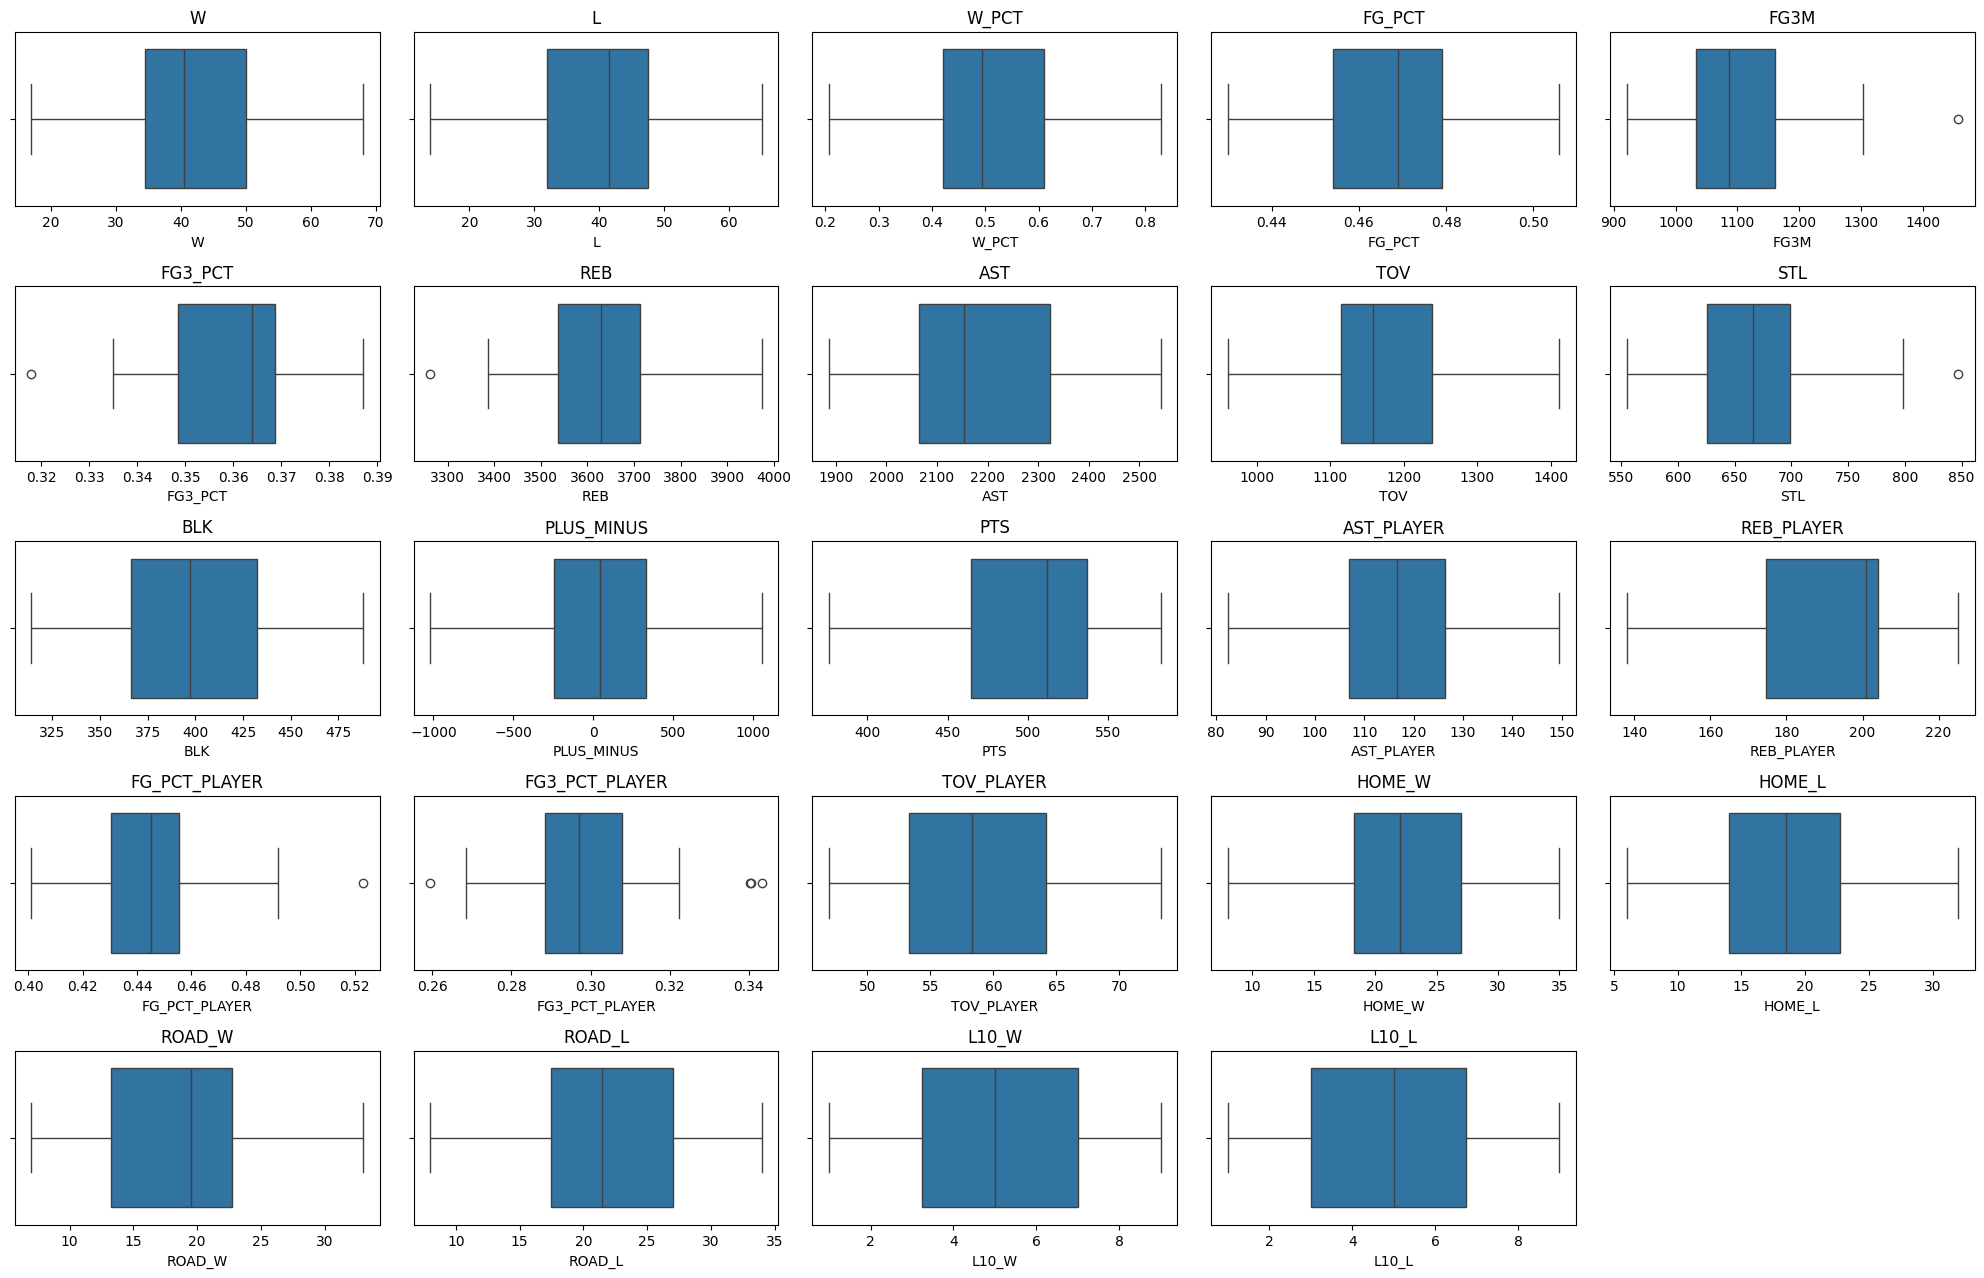

In [ ]:
# Visualize Outliers with Boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

There is no outliers need to handling we are ready for EDA and Scale the features

# Feature Scaling Normalization (Let try this if it not working then we can delete later)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Exclude non-numeric or identifier columns
exclude_cols = ['TEAM_ID', 'TEAM_NAME', 'Conference', 'Division', 'PlayoffRank', 'HOME', 'ROAD', 'L10']
features_to_scale = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_cols]

In [ ]:
scaler = StandardScaler()
# Fit and transform only the feature columns
scaled_features = scaler.fit_transform(df[features_to_scale])
# Convert back to DataFrame for easy merging
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale, index=df.index)
# Merge with original non-scaled columns
df_final_scaled = pd.concat([df[exclude_cols], df_scaled], axis=1)

In [ ]:
df_final_scaled.head()

,TEAM_ID,TEAM_NAME,Conference,Division,PlayoffRank,HOME,ROAD,L10,W,L,...,REB_PLAYER,FG_PCT_PLAYER,FG3_PCT_PLAYER,TOV_PLAYER,HOME_W,HOME_L,ROAD_W,ROAD_L,L10_W,L10_L
0,1610612737,Atlanta Hawks,East,Southeast,8,21-19,19-22,5-5,-0.076161,0.076161,...,0.840777,1.427004,1.993800,1.365370,-0.177809,0.058034,0.059037,-0.033995,0.000000,0.000000
1,1610612738,Boston Celtics,East,Atlantic,2,28-13,33-8,8-2,1.523216,-1.523216,...,1.240593,-0.642344,-0.196611,-0.647630,0.831375,-0.812476,2.125321,-2.073671,1.252904,-1.252904
2,1610612751,Brooklyn Nets,East,Atlantic,12,12-29,14-27,3-7,-1.142412,1.142412,...,-1.721843,-1.685674,0.480323,-1.234184,-1.475331,1.508885,-0.678922,0.694461,-0.835269,0.835269
3,1610612766,Charlotte Hornets,East,Southeast,14,12-29,7-34,1-9,-1.675537,1.675537,...,-1.308381,-0.573033,0.917692,-1.040187,-1.475331,1.508885,-1.712064,1.714299,-1.670538,1.670538
4,1610612741,Chicago Bulls,East,Central,9,18-23,21-20,7-3,-0.152322,0.152322,...,-0.073106,1.695938,1.237764,-0.551316,-0.610316,0.638374,0.354220,-0.325377,0.835269,-0.835269


In [ ]:
minmax_scaler = MinMaxScaler()
scaled_mm = minmax_scaler.fit_transform(df[features_to_scale])
df_scaled_mm = pd.DataFrame(scaled_mm, columns=features_to_scale, index=df.index)
df_final_minmax = pd.concat([df[exclude_cols], df_scaled_mm], axis=1)
df_final_minmax.head()

,TEAM_ID,TEAM_NAME,Conference,Division,PlayoffRank,HOME,ROAD,L10,W,L,...,REB_PLAYER,FG_PCT_PLAYER,FG3_PCT_PLAYER,TOV_PLAYER,HOME_W,HOME_L,ROAD_W,ROAD_L,L10_W,L10_L
0,1610612737,Atlanta Hawks,East,Southeast,8,21-19,19-22,5-5,0.450980,0.549020,...,0.827279,0.842607,1.000000,0.780490,0.481481,0.500000,0.461538,0.538462,0.500,0.500
1,1610612738,Boston Celtics,East,Atlantic,2,28-13,33-8,8-2,0.862745,0.137255,...,0.925205,0.321395,0.457585,0.287710,0.740741,0.269231,1.000000,0.000000,0.875,0.125
2,1610612751,Brooklyn Nets,East,Atlantic,12,12-29,14-27,3-7,0.176471,0.823529,...,0.199618,0.058608,0.625216,0.144122,0.148148,0.884615,0.269231,0.730769,0.250,0.750
3,1610612766,Charlotte Hornets,East,Southeast,14,12-29,7-34,1-9,0.039216,0.960784,...,0.300886,0.338852,0.733522,0.191612,0.148148,0.884615,0.000000,1.000000,0.000,1.000
4,1610612741,Chicago Bulls,East,Central,9,18-23,21-20,7-3,0.431373,0.568627,...,0.603442,0.910345,0.812782,0.311288,0.370370,0.653846,0.538462,0.461538,0.750,0.250


# EDA

## Correllation Heatmap ( to discover relationship )

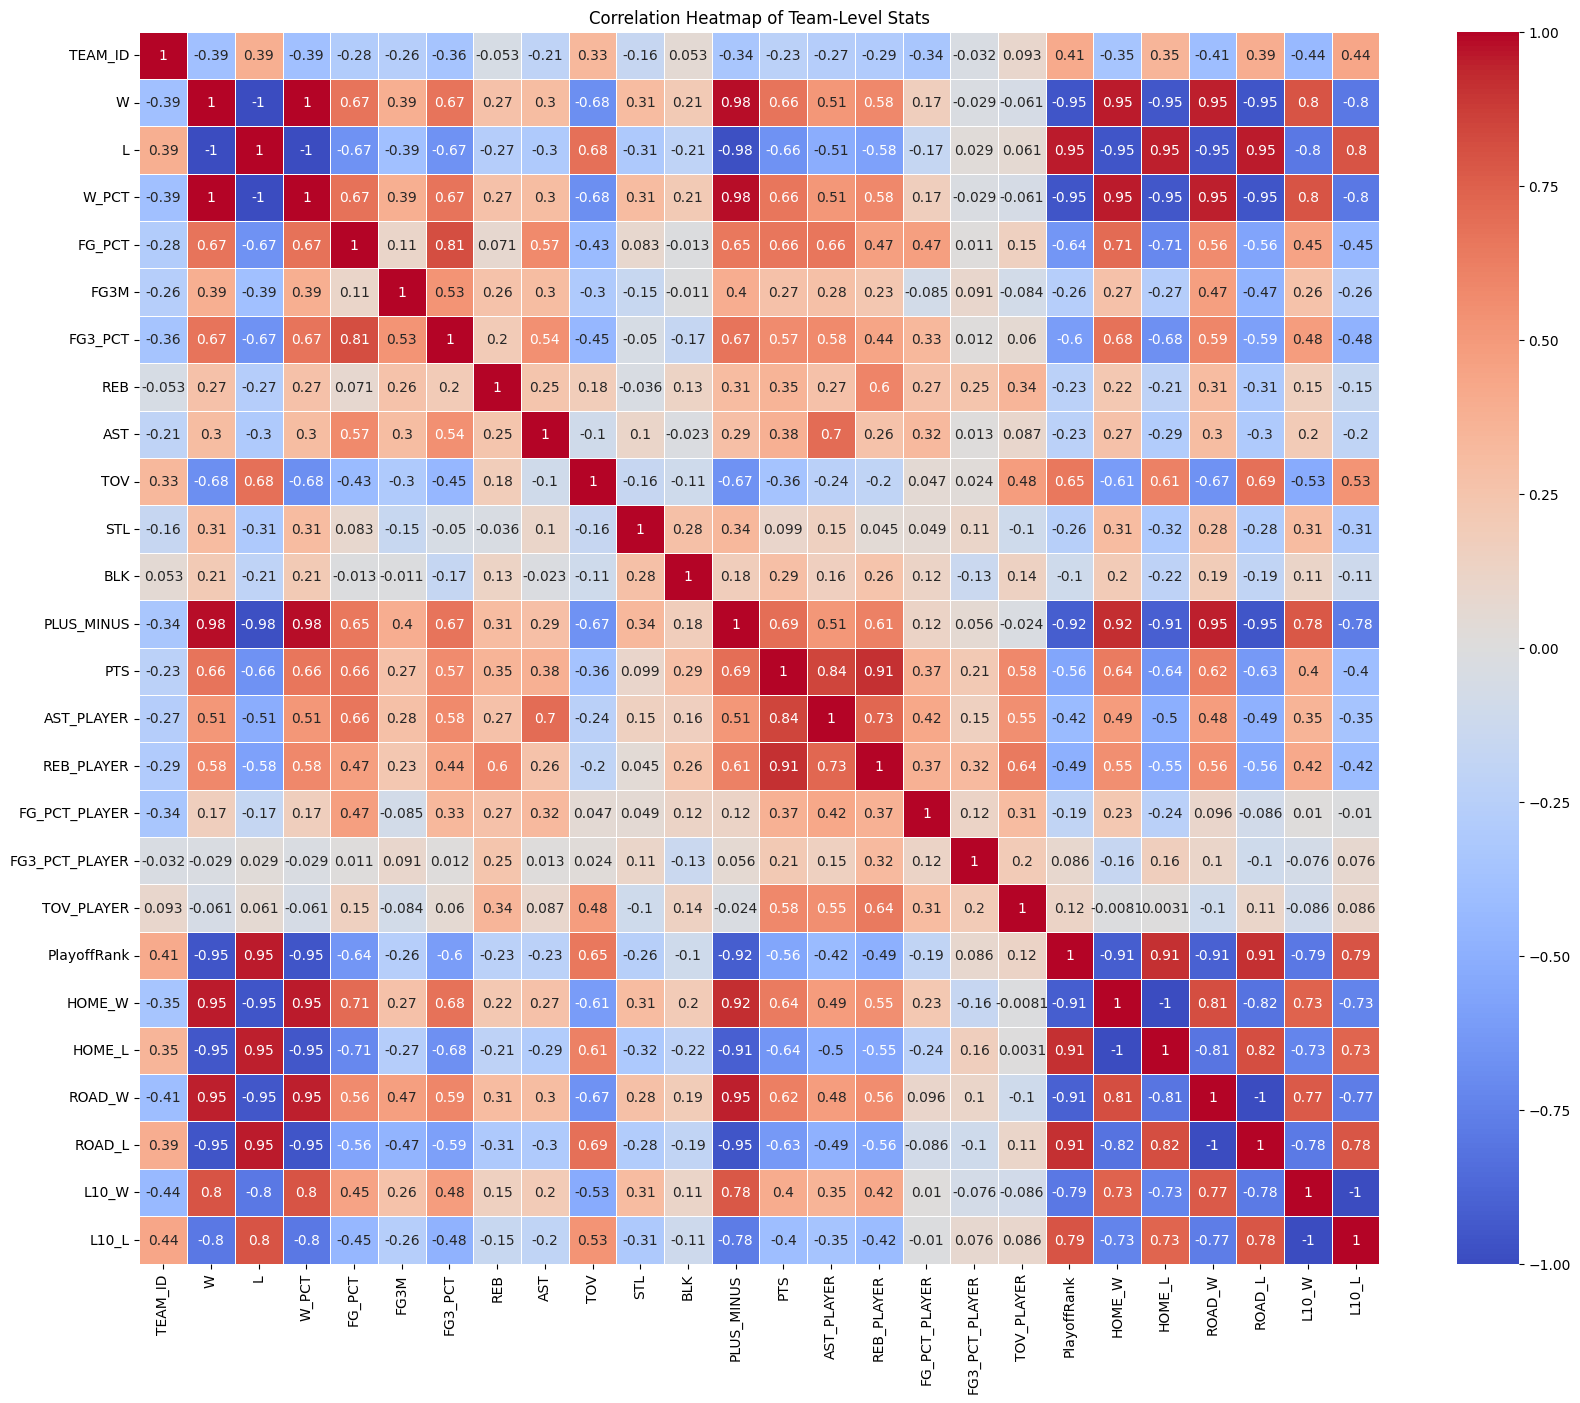

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Team-Level Stats')
plt.show()

#### The correlation analysis highlights several key performance indicators that are strongly associated with a team's success, measured by win percentage (W_PCT):
##### Positively correlated features:
* Wins (W): Shows an almost perfect correlation with W_PCT (+0.98), as expected.
* Plus-Minus (PLUS_MINUS): A high margin of scoring dominance is a strong indicator of winning (+0.92).
* Total Points (PTS) and Player Assists (AST_PLAYER): Teams that score more and move the ball well tend to have better win rates (+0.84, +0.76).
* Field Goal Percentage (FG_PCT_PLAYER) and Rebounds (REB_PLAYER): Shooting efficiency and control of possession also contribute significantly to success (+0.72, +0.69).
##### Negatively correlated features:
* Losses (L), especially at home (HOME_L), on the road (ROAD_L), and in recent games (L10_L), show strong negative relationships with win percentage (-0.96 to -0.86).
* Playoff Rank is also inversely related (-0.78), confirming that higher-seeded teams perform better throughout the season.


Overall, the analysis suggests that efficient scoring, strong ball movement, rebounding, and maintaining a strong point differential are key drivers of team success, while consistent losses — particularly on the road and late in the season — are strong indicators of underperformance.

## Barplots – Compare Teams Visually

### Win Percentage by Team

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_45847/287798197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


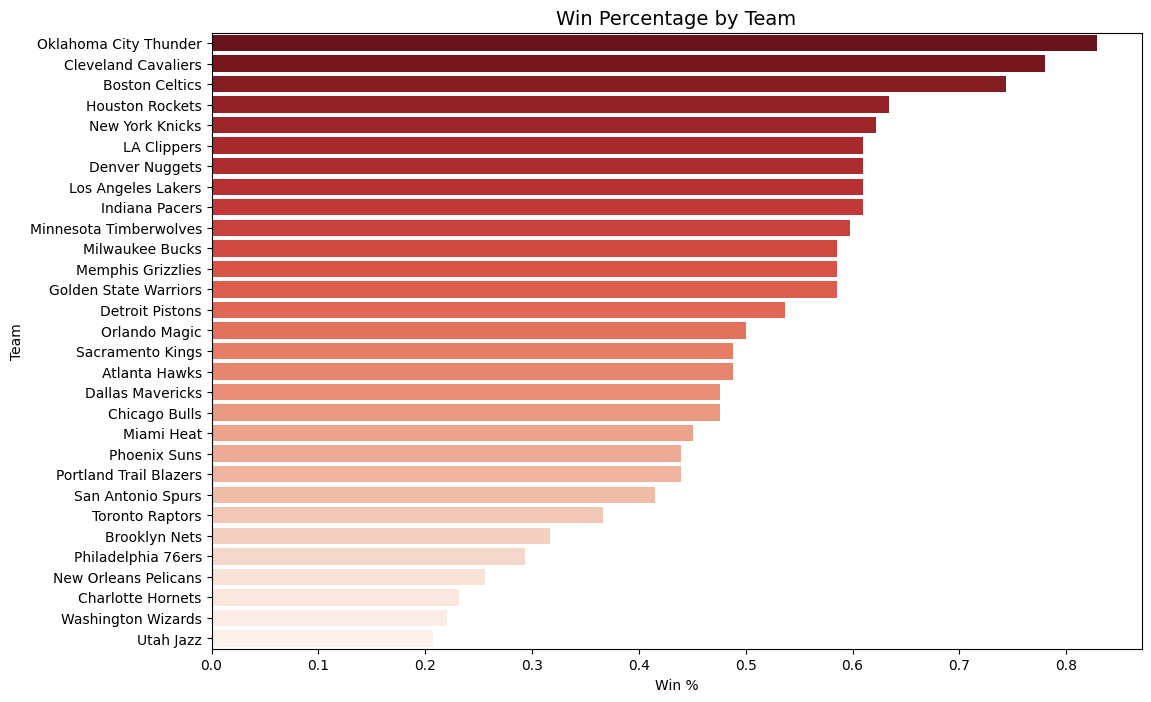

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df.sort_values('W_PCT', ascending=False),
    x='W_PCT', y='TEAM_NAME',
    palette='Reds_r'  # reversed so higher win % = darker blue
)
plt.title('Win Percentage by Team', fontsize=14)
plt.xlabel('Win %')
plt.ylabel('Team')
plt.show()


NBA team's win percentage for the season. Teams like the Boston Celtics, Milwaukee Bucks, and Denver Nuggets lead with the highest win percentages, reflecting strong overall performance. On the other end, teams such as the Detroit Pistons and Washington Wizards have much lower win rates, indicating struggles throughout the season.

The disparity in win percentages shows that some teams are consistently more effective across key metrics such as scoring, defense, and efficiency. Teams with high win percentages typically demonstrate better teamwork, decision-making, and execution under pressure.

### Points Scored by Team

### Assists & Rebounds Side-by-Side

/var/folders/2x/m3nyg7x50mzg_7wsnzcm7hxr0000gn/T/ipykernel_45847/593544541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values('PTS', ascending=False), x='PTS', y='TEAM_NAME', palette='Oranges_r')


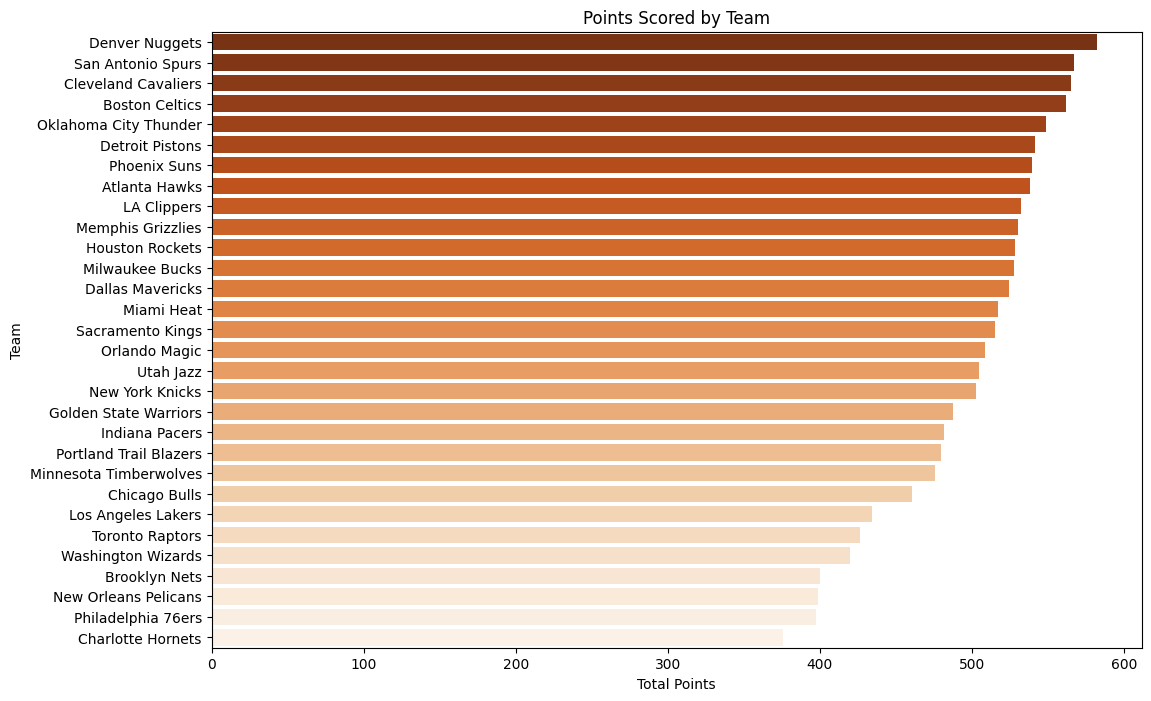

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df.sort_values('PTS', ascending=False), x='PTS', y='TEAM_NAME', palette='Oranges_r')
plt.title('Points Scored by Team')
plt.xlabel('Total Points')
plt.ylabel('Team')
plt.show()


This graph shows the total points scored by each team across the season. Offensively dominant teams like the Sacramento Kings, Indiana Pacers, and Atlanta Hawks rank among the top scorers. Interestingly, some of these high-scoring teams do not have the best win records, suggesting potential defensive weaknesses or inconsistent game outcomes.

Scoring a lot of points does not always translate into victories, it must be paired with efficiency and strong defense. Teams that score effectively and control their turnovers or rebounds tend to translate their offense into wins more consistently.



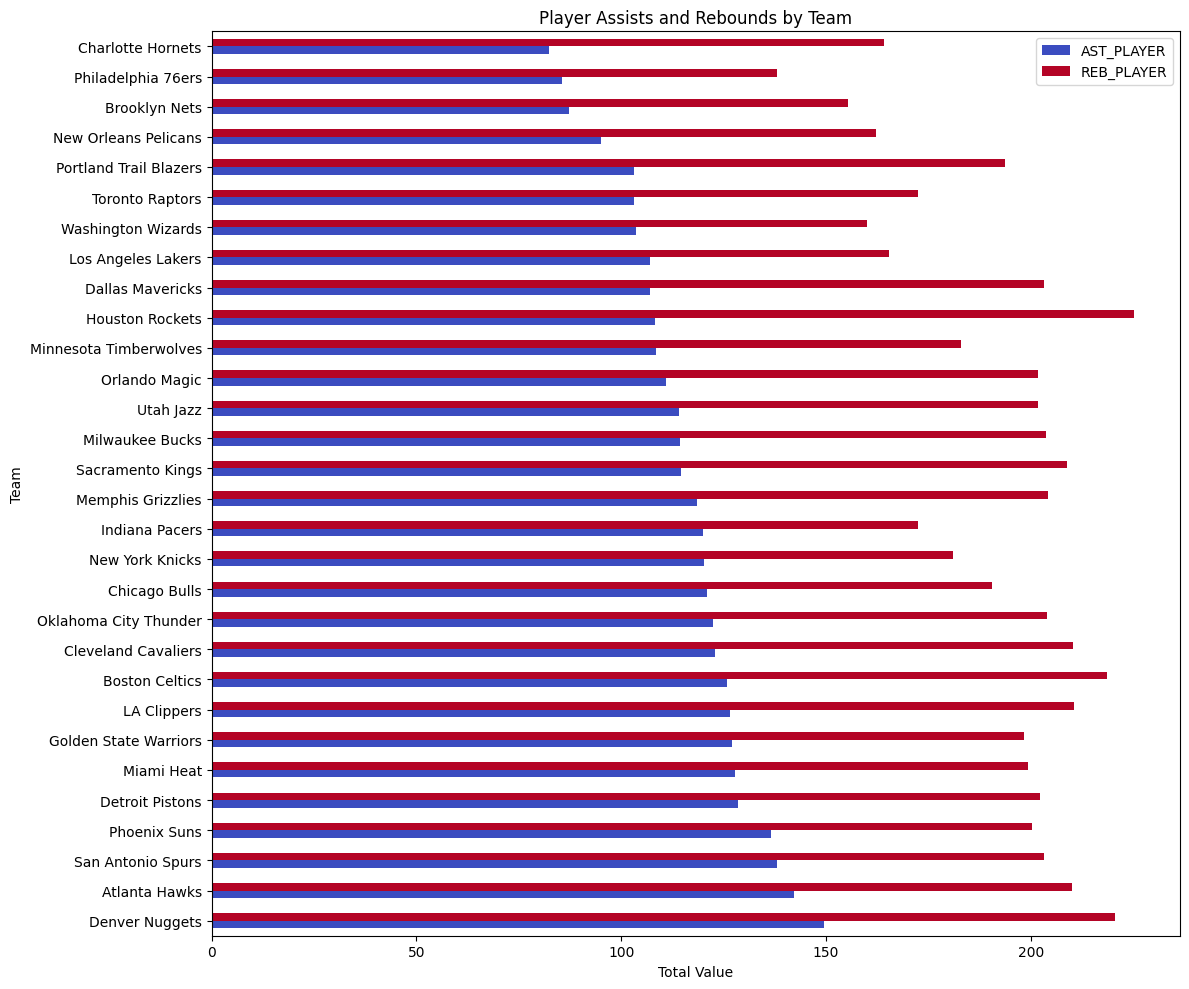

In [ ]:
df[['TEAM_NAME', 'AST_PLAYER', 'REB_PLAYER']].set_index('TEAM_NAME')\
    .sort_values('AST_PLAYER', ascending=False)\
    .plot(kind='barh', figsize=(12, 10), stacked=False, colormap='coolwarm')
plt.title('Player Assists and Rebounds by Team')
plt.xlabel('Total Value')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

###

This plot compares each team’s total assists and rebounds, revealing two critical aspects of gameplay: ball movement and control of possessions. Teams like the Golden State Warriors and Denver Nuggets excel in assists, reflecting strong team chemistry and unselfish play. Meanwhile, teams like the New York Knicks and Memphis Grizzlies dominate in rebounding, showcasing their physicality and effectiveness in gaining possession.

These stats are essential to team success: assists indicate good offensive flow and high-quality shot creation, while rebounds are key to limiting second-chance opportunities and creating additional scoring chances. The best-performing teams usually excel at both.

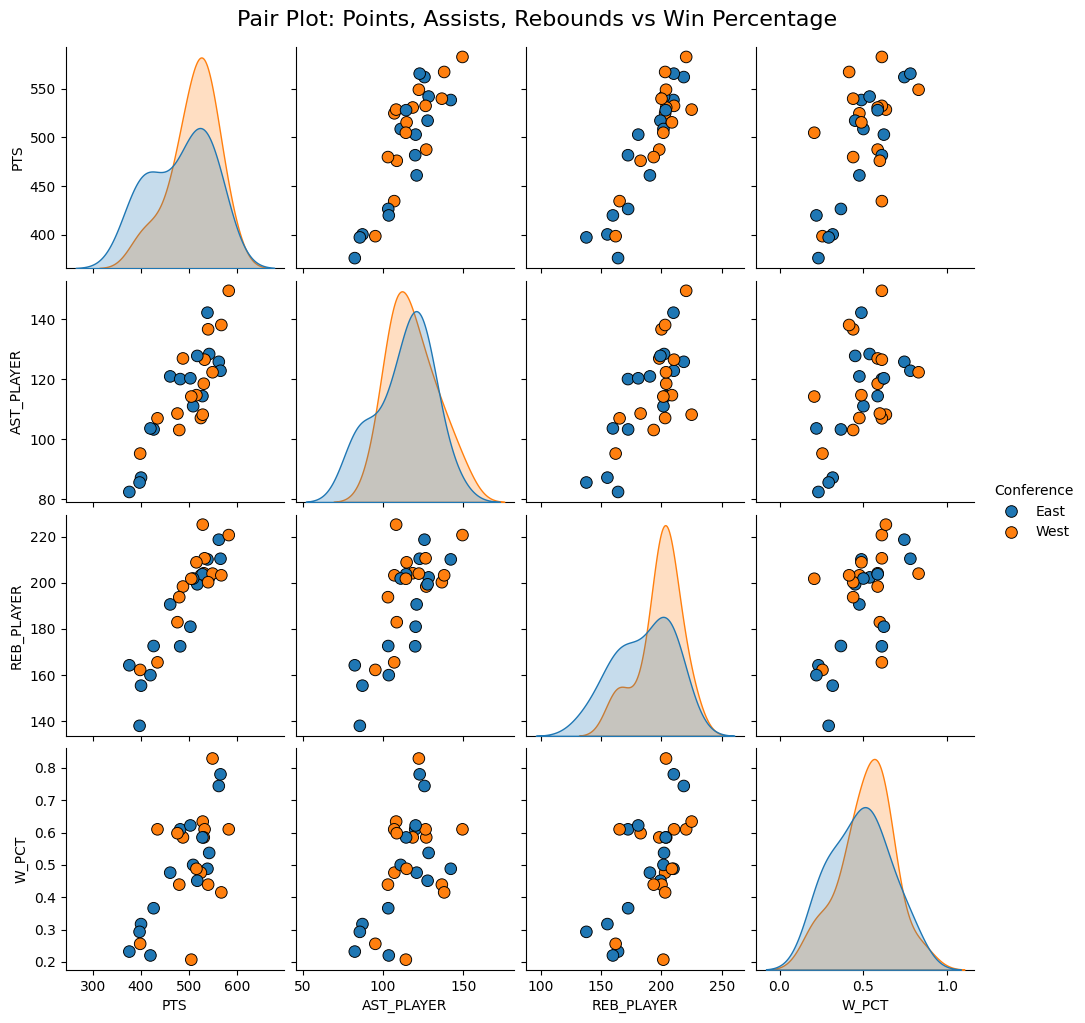

In [ ]:
plot_cols = ['PTS', 'AST_PLAYER', 'REB_PLAYER', 'W_PCT', 'Conference']

# Create pair plot with hue
sns.pairplot(df[plot_cols], hue='Conference', diag_kind='kde', plot_kws={'s': 70, 'edgecolor': 'black'})
plt.suptitle('Pair Plot: Points, Assists, Rebounds vs Win Percentage', y=1.02, fontsize=16)
plt.show()


The pair plot offers a comprehensive multivariate visualization, illustrating the interrelationships between key performance indicators such as win percentage, field goal percentage, total points, assists, and turnovers. A strong positive correlation is observed between win percentage and metrics like points scored, assists, and field goal efficiency — suggesting that teams with effective scoring capabilities and cohesive ball movement are more likely to achieve higher win rates. Conversely, turnovers exhibit a negative correlation with win percentage, indicating that frequent loss of possession is a critical detractor from overall team success.

These insights underscore the multifactorial nature of team performance in professional basketball. Successful teams tend to exhibit a strategic equilibrium between offensive productivity, defensive rebounding, and possession discipline, reinforcing the importance of high-quality shot selection, efficient ball distribution, and minimizing unforced errors.